## TP8 implementation de la classification hierarchique En Pyhon
##    GROUPE 3 CONSTITUE DE :
##        - LEPAFO MOFFO Baurel               21S2782
##        - MANFOUO SELATSA Ridano            16U2848
##        - TEINGA KAMGUEN Emmanuel Rufin     21S2822
##        - MEBODO ONOMO JUSTIN JORDAN        19M2217


## 1) SECTION 1: Classification Hierarchique Appliquee a un tableau numpy

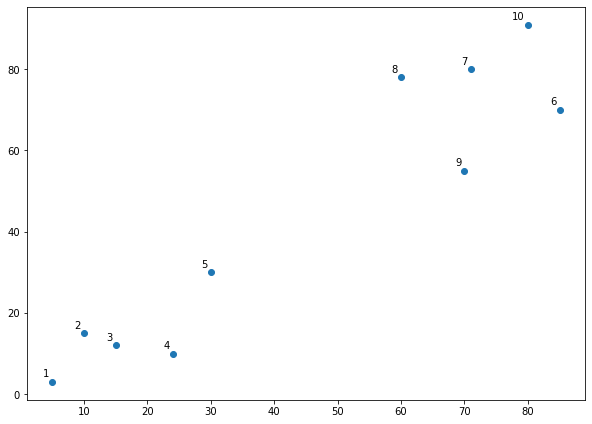

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## Utilisons les donnees representees par un array numpy
X = np.array([[5,3],[10,15],[15,12],[24,10],[30,30],[85,70],[71,80],[60,78],[70,55],[80,91],])

## affichons les differents points representant nos donnees avec le code suivant

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(
        label,xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom')
plt.show()



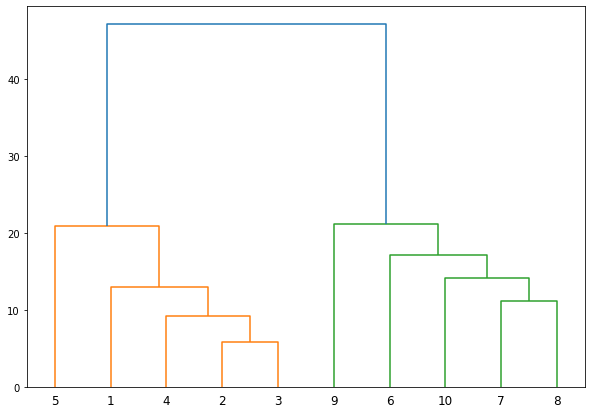

In [14]:
## affichons notre dendogram a l'aide scipy

from scipy.cluster.hierarchy import dendrogram,linkage
from matplotlib import pyplot as plt

linked = linkage(X,'single')
labelList = range(1,11)
plt.figure(figsize=(10,7))
dendrogram(linked,
         orientation='top',
         labels =labelList,
         distance_sort='descending',
         show_leaf_counts= True)
plt.show()

In [15]:
## appliquons la classification hierarchique a nos donnees X ci dessus
from sklearn.cluster import AgglomerativeClustering # on aura besoin de la classification agglomertive

## ici nous definissons le nombre de clusters, le type de distance et ensuite le linkage servant a minimiser les differences entre cluster
cluster = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='ward')
cluster.fit_predict(X) ## ici nous retoutnons le noms des clusters auxquelles appartient chaque point de nos donnees
print(cluster.labels_) ## la sortie est un tableau

[1 1 1 1 1 0 0 0 0 0]


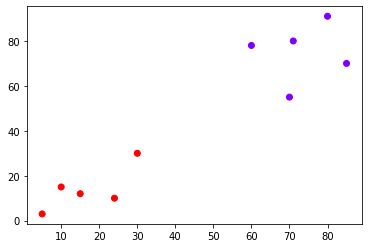

In [16]:
## maintenant affichons les differents clusters

plt.scatter(X[:,0],X[:,1],c=cluster.labels_,cmap='rainbow')

## 2)Section2 implementation de la classification Hierarchique sur le dataset shopping-data.csv


In [18]:
# importons nos donnees
customer_data = pd.read_csv('data/shopping-data.csv')

In [19]:
## observons un peu la forme de notre dataset
customer_data.shape

(200, 5)

In [20]:
# regardons l'entete de nos donnees

customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
# nous selectionnons juste les colonnes a valeur numerique de notre dataset

data= customer_data.iloc[:,3:5].values

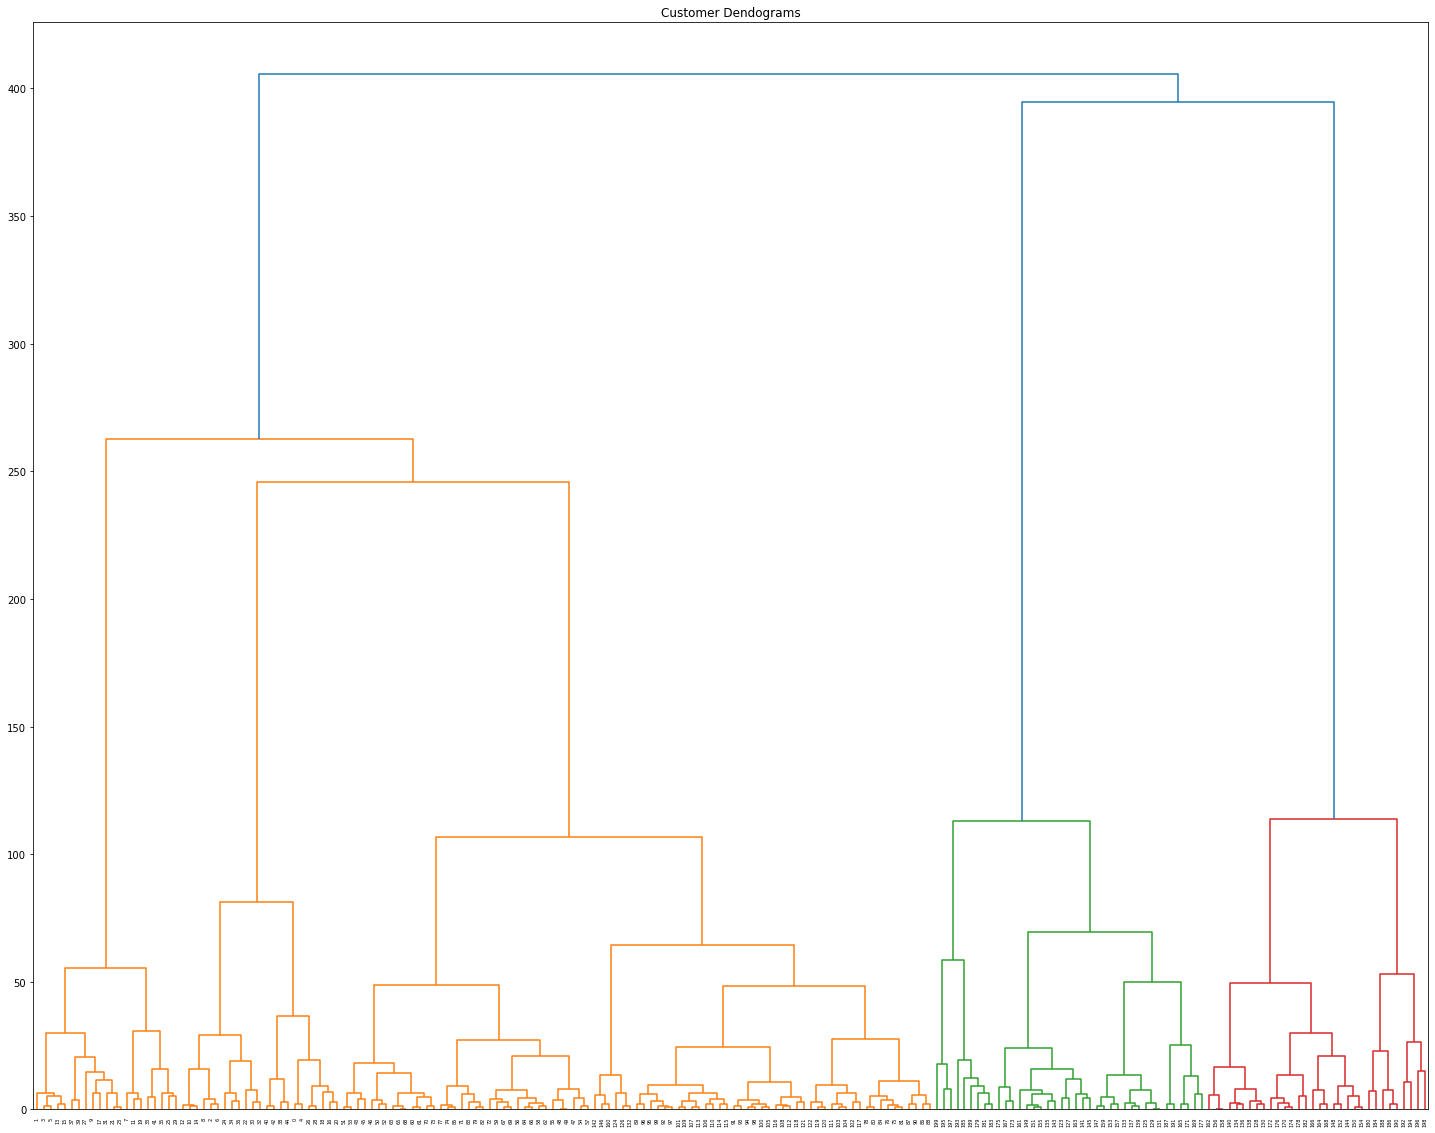

In [26]:
# Ensuite il nous faut determiner les clusters ou nous voulons que nos donnees soient scinder
import scipy.cluster.hierarchy as shc ## ceci nous permet d'importer la classification hierarchique

plt.figure(figsize=(25,20))
plt.title("Customer Dendograms")
dend= shc.dendrogram(shc.linkage(data,method='ward'))## et ici on defini notre linkage de methode ward

In [24]:
## maintenant regroupons nos donnees a l'aide de 5 cluster comme nous avons pu le percvoir a l'Aide de la ligne horizontalle rouge du tutoriel 

cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(data) ## nous voyons par ici qu'on a 5 cluster de 0 a 4

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

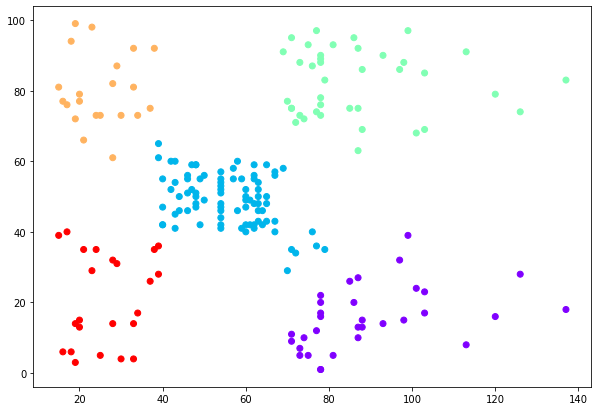

In [25]:
## Ici bas nous affichons nos differents cluster
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap='rainbow')

In [ ]:
## nous voyons par notre graphique ci haut que les donnees en bas a droite correspondent aux consomateurs avec un gros salaire mais de faibles depenses
## tandis que ceux en haut a droite ce sont des consomateurs avec un gros salaire et de grosses depenses
## les consomateurs au milieu quand a eux ont un salaire moyen et des revenu moyens
## avec ce type d'analyse une compagnie peut cibler des consommateurs en fonction de leurs revenus